# 求人サイト
グループ共通で年収を調べる
→年収と何かしらの関係をメインテーマ

**メインテーマとしてtypeの総合ランキングから上位20社の年収と位置情報の関係を可視化し、考察する**

# メインテーマのデータ取得

In [3]:
import requests
from bs4 import BeautifulSoup
import time

# サーバーへの負荷を軽減するための待機時間
time.sleep(30)

# 企業リストページのURL
list_url = "https://type.jp/rank/"

# リストページのリクエスト
response = requests.get(list_url)
if response.status_code == 200:
    print("リストページの取得成功")
else:
    print(f"リストページの取得失敗: {response.status_code}")

# BeautifulSoupでページを解析
soup = BeautifulSoup(response.content, 'html.parser')

#全てのspanタグ、class = salaryとclass = placeを取得して表示
salary_spans = soup.find_all('span', class_="salary")
place_spans = soup.find_all('span', class_="place")

print("年収")
for i, span in enumerate(salary_spans):
    print(f"{i + 1}: {span.get_text(strip=True)}")

print("位置:")
for i, span in enumerate(place_spans):
    print(f"{i + 1}: {span.get_text(strip=True)}")



リストページの取得成功
年収
1: 350～1000万円
2: 450～800万円
3: 350～600万円
4: -
5: -
6: 250～1400万円
7: 300～1000万円
8: 300～600万円
9: 350～600万円
10: 300～500万円
11: 350～600万円
12: 250～750万円
13: 400～1200万円
14: 300～500万円
15: 250～800万円
16: 400～900万円
17: 300～800万円
18: -
19: -
20: 250～1000万円
位置:
1: 東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨城県、栃木県、群馬県、新潟県、富山県、石川県、福井県、山梨県、長野県、岐阜県、静岡県、愛知県、三重県、滋賀県、京都府、大阪府、兵庫県、奈良県、和歌山県、鳥取県、島根県、岡山県、広島県、山口県、徳島県、香川県、愛媛県、高知県、福岡県、佐賀県、長崎県、熊本県、大分県、宮崎県、鹿児島県
2: 東京都、宮城県、愛知県、大阪府、広島県、愛媛県、福岡県
3: 東京都、神奈川県、大阪府
4: 東京都、大阪府
5: 東京都
6: 東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨城県、栃木県、群馬県、新潟県、富山県、石川県、福井県、山梨県、長野県、岐阜県、静岡県、愛知県、三重県、滋賀県、京都府、大阪府、兵庫県、奈良県、和歌山県、鳥取県、島根県、岡山県、広島県、山口県、徳島県、香川県、愛媛県、高知県、福岡県、佐賀県、長崎県、熊本県、大分県、宮崎県、鹿児島県、沖縄県
7: 東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨城県、栃木県、群馬県、新潟県、富山県、石川県、福井県、山梨県、長野県、岐阜県、静岡県、愛知県、三重県、滋賀県、京都府、大阪府、兵庫県、奈良県、和歌山県、鳥取県、島根県、岡山県、広島県、山口県、徳島県、香川県、愛媛県、高知県、福岡県、佐賀県、長崎県、熊本県、大分県、宮崎県、鹿児島県、沖縄県
8: 東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨城県、栃木県、群馬県、新潟県、富山県、石川県、福井県、山梨県、長野県、岐阜県、静岡県、愛知

# メインテーマのデータ保存

In [4]:
import sqlite3


# SQLiteデータベースの作成または接続
conn = sqlite3.connect("job_data.db")
cursor = conn.cursor()

# テーブルの作成
cursor.execute("""
CREATE TABLE IF NOT EXISTS job_data (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    salary TEXT,
    location TEXT
)
""")

# スクレイピングしたデータを挿入
for salary, place in zip(salary_spans, place_spans):
    cursor.execute("INSERT INTO job_data (salary, location) VALUES (?, ?)",
                   (salary.get_text(strip=True), place.get_text(strip=True)))

conn.commit()
conn.close()
print("データベースに保存が完了しました。")

データベースに保存が完了しました。


In [5]:
#データベース
import sqlite3
import pandas as pd

# SQLiteデータベースに接続
conn = sqlite3.connect('job_data.db')

# SQLクエリを実行してデータを取得
query = "SELECT * FROM job_data"

# データをDataFrameに読み込む
df = pd.read_sql(query, conn)

# 結果を表示
print(df)

# データベース接続を閉じる
conn.close()

    id      salary                                           location
0    1  350～1000万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...
1    2   450～800万円                        東京都、宮城県、愛知県、大阪府、広島県、愛媛県、福岡県
2    3   350～600万円                                       東京都、神奈川県、大阪府
3    4           -                                            東京都、大阪府
4    5           -                                                東京都
5    6  250～1400万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...
6    7  300～1000万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...
7    8   300～600万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...
8    9   350～600万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...
9   10   300～500万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...
10  11   350～600万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...
11  12   250～750万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...
12  13  400～1200万円  東京都、神奈川県、埼玉県、千葉県、岩手県、宮城県、山形県、福島県、茨城県、栃木県、群馬県、新...
13  14   300～500万円  

# 分析・可視化

In [8]:
def convert_salary_to_numeric(salary):
    try:
        # '万円' を削除し、'～' を '-' に置換
        salary = salary.replace('万円', '').replace('～', '-')
        if '-' in salary:
            # 範囲を分割して数値化（空文字列を防ぐ）
            parts = salary.split('-')
            if len(parts) == 2 and parts[0] and parts[1]:  # 両方が空でないことを確認
                low, high = map(float, parts)
                return (low + high) / 2  # 中間値を返す
        return float(salary)  # 単一値はそのまま返す
    except ValueError:
        # 不正な形式の場合、デフォルト値を返す
        print(f"変換エラー: {salary}")
        return None  # 必要に応じて適切なデフォルト値に変更

# 年収データの前処理
df['salary_numeric'] = df['salary'].apply(convert_salary_to_numeric)

# データ確認（エラーがあれば None となる）
print(df)

変換エラー: -
変換エラー: -
変換エラー: -
変換エラー: -
    id      salary                                           location  \
0    1  350～1000万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
1    2   450～800万円                        東京都、宮城県、愛知県、大阪府、広島県、愛媛県、福岡県   
2    3   350～600万円                                       東京都、神奈川県、大阪府   
3    4           -                                            東京都、大阪府   
4    5           -                                                東京都   
5    6  250～1400万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
6    7  300～1000万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
7    8   300～600万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
8    9   350～600万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
9   10   300～500万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
10  11   350～600万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
11  12   250～750万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
12  13  400～120

In [39]:
print(df)

    id      salary                                           location  \
0    1  350～1000万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
1    2   450～800万円                        東京都、宮城県、愛知県、大阪府、広島県、愛媛県、福岡県   
2    3   350～600万円                                       東京都、神奈川県、大阪府   
5    6  250～1400万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
6    7  300～1000万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
7    8   300～600万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
8    9   350～600万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
9   10   300～500万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
10  11   350～600万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
11  12   250～750万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
12  13  400～1200万円  東京都、神奈川県、埼玉県、千葉県、岩手県、宮城県、山形県、福島県、茨城県、栃木県、群馬県、新...   
13  14   300～500万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
14  15   250～800万円                                 

In [10]:
# 欠損値の削除
df = df.dropna(subset=['salary_numeric', 'location'])

In [11]:
avg_salary_by_location = df.groupby('location')['salary_numeric'].mean()
print(avg_salary_by_location)

location
東京都、宮城県、愛知県、大阪府、広島県、愛媛県、福岡県                                                                                                                                                                       625.000
東京都、神奈川県、埼玉県、千葉県                                                                                                                                                                                  537.500
東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨城県、栃木県、群馬県、新潟県、富山県、石川県、福井県、山梨県、長野県、岐阜県、静岡県、愛知県、三重県、滋賀県、京都府、大阪府、兵庫県、奈良県、和歌山県、鳥取県、島根県、岡山県、広島県、山口県、徳島県、香川県、愛媛県、高知県、福岡県、佐賀県、長崎県、熊本県、大分県、宮崎県、鹿児島県        675.000
東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨城県、栃木県、群馬県、新潟県、富山県、石川県、福井県、山梨県、長野県、岐阜県、静岡県、愛知県、三重県、滋賀県、京都府、大阪府、兵庫県、奈良県、和歌山県、鳥取県、島根県、岡山県、広島県、山口県、徳島県、香川県、愛媛県、高知県、福岡県、佐賀県、長崎県、熊本県、大分県、宮崎県、鹿児島県、沖縄県    521.875
東京都、神奈川県、埼玉県、千葉県、岩手県、宮城県、山形県、福島県、茨城県、栃木県、群馬県、新潟県、富山県、長野県、岐阜県、静岡県、愛知県、三重県、滋賀県、京都府、大阪府、兵庫県、奈良県、鳥取県、島根県、岡山県、広島県、山口県、愛媛県、高知県、福岡県、長崎県、熊本県、大分県、宮崎県、鹿児島県、沖縄県                                  

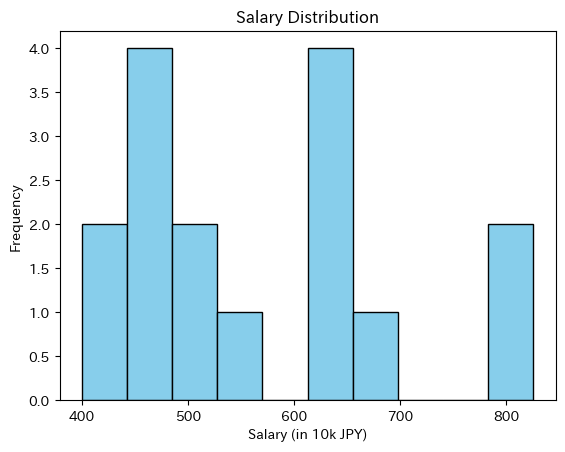

<Figure size 640x480 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt

import seaborn as sns

# 全体の年収分布
plt.hist(df['salary_numeric'], bins=10, color='skyblue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary (in 10k JPY)')
plt.ylabel('Frequency')
plt.show()

# グラフを表示
plt.tight_layout()
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 28.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=6ae8a4e2f75545f3fb7ac8c38094b774607a3d343ad366fbaf5baa41cd296a54
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


<ipython-input-24-800ebb7b07b7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_salary_by_location, x='location', y='salary_numeric', palette="Blues")


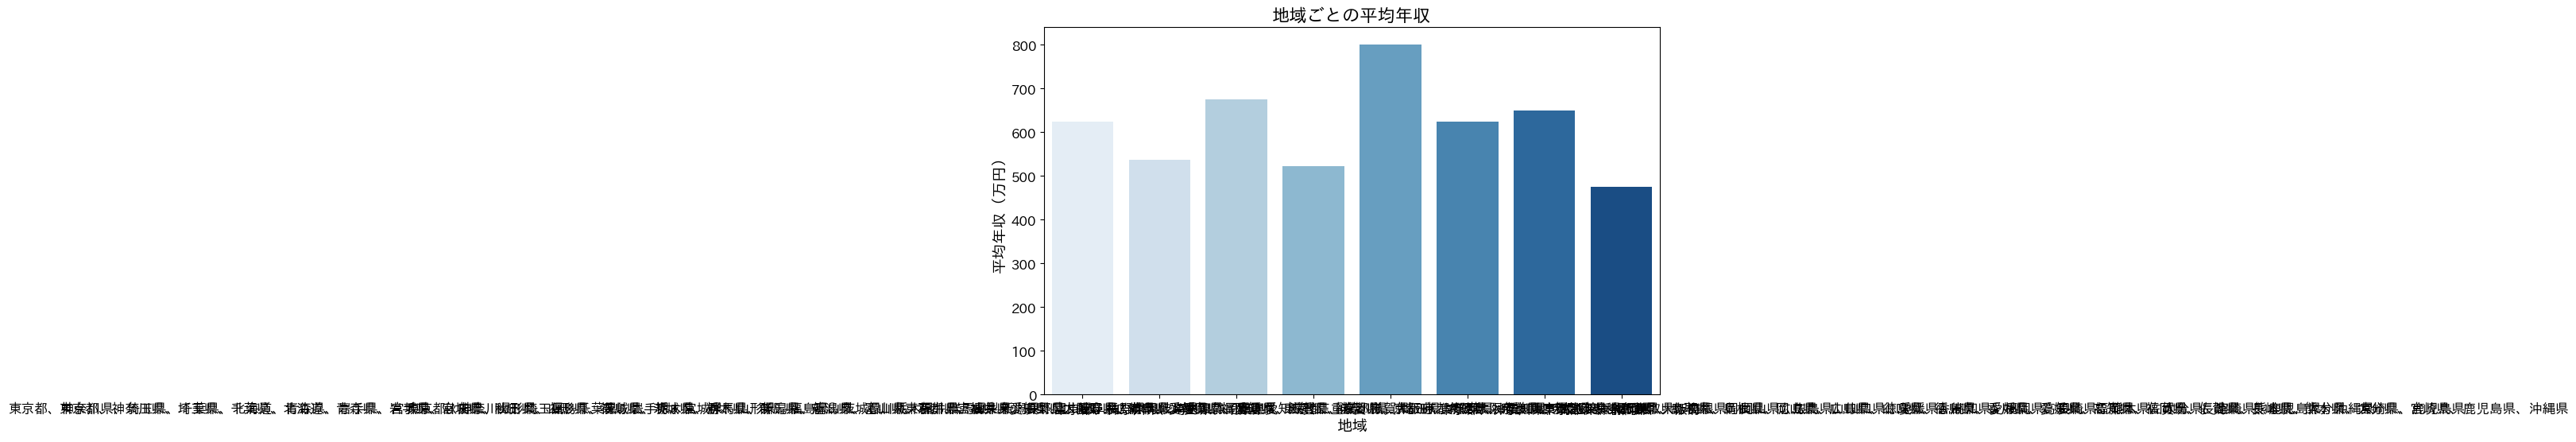

In [24]:
!pip install japanize-matplotlib
import japanize_matplotlib


In [27]:
!pip install geopandas matplotlib

In [36]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 70.2 MB/s eta 0:00:00


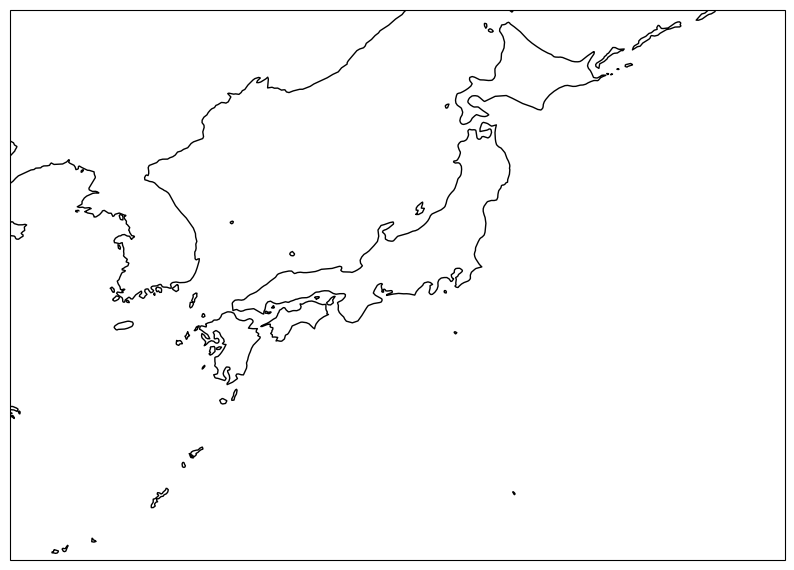

In [46]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Japanの地図を描く
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# 日本の国境を描画
ax.coastlines()
ax.set_extent([122, 153, 24, 46], crs=ccrs.PlateCarree())  # 日本の範囲

# 地図を表示
plt.show()

In [44]:
# サンプルデータ
data = {
    'id': [1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20],
    'salary_numeric': [675.0, 625.0, 475.0, 825.0, 650.0, 450.0, 475.0, 400.0, 475.0, 500.0, 800.0, 400.0, 525.0, 650.0, 550.0, 625.0],
    'location': [
        '東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県',
        '東京都、宮城県、愛知県、大阪府、広島県、愛媛県、福岡県',
        '東京都、神奈川県、大阪府',
        '東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨城県、栃木県、群馬県、新潟県、富山県、石川県、福井県、山梨県、長野県、岐阜県、静岡県、愛知県、三重県、滋賀県、京都府、大阪府、兵庫県、奈良県、和歌山県、鳥取県、島根県、岡山県、広島県、山口県、徳島県、香川県、愛媛県、高知県、福岡県、佐賀県、長崎県、熊本県、大分県、宮崎県、鹿児島県、沖縄県',
        '東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨城県、栃木県、群馬県、新潟県、富山県、石川県、福井県、山梨県、長野県、岐阜県、静岡県、愛知県、三重県、滋賀県、京都府、大阪府、兵庫県、奈良県、和歌山県、鳥取県、島根県、岡山県、広島県、山口県、徳島県、香川県、愛媛県、高知県、福岡県、佐賀県、長崎県、熊本県、大分県、宮崎県、鹿児島県、沖縄県',
        '東京都、神奈川県、埼玉県、千葉県、愛知県、大阪府、福岡県'
    ]
}

# マッピングの準備
location_mapping = {}

# location列を、都道府県ごとに分割してマッピング
for idx, loc_str in enumerate(data['location']):
    locations = loc_str.split('、')  # 「、」で分割
    for location in locations:
        if location not in location_mapping:
            location_mapping[location] = []
        location_mapping[location].append({
            'id': data['id'][idx],
            'salary_numeric': data['salary_numeric'][idx]
        })

# 結果確認
for location, info in location_mapping.items():
    print(f"Location: {location}")
    for entry in info:
        print(f"  ID: {entry['id']}, Salary: {entry['salary_numeric']}")

Location: 東京都
  ID: 1, Salary: 675.0
  ID: 2, Salary: 625.0
  ID: 3, Salary: 475.0
  ID: 6, Salary: 825.0
  ID: 7, Salary: 650.0
  ID: 8, Salary: 450.0
Location: 神奈川県
  ID: 1, Salary: 675.0
  ID: 3, Salary: 475.0
  ID: 6, Salary: 825.0
  ID: 7, Salary: 650.0
  ID: 8, Salary: 450.0
Location: 埼玉県
  ID: 1, Salary: 675.0
  ID: 6, Salary: 825.0
  ID: 7, Salary: 650.0
  ID: 8, Salary: 450.0
Location: 千葉県
  ID: 1, Salary: 675.0
  ID: 6, Salary: 825.0
  ID: 7, Salary: 650.0
  ID: 8, Salary: 450.0
Location: 北海道
  ID: 1, Salary: 675.0
  ID: 6, Salary: 825.0
  ID: 7, Salary: 650.0
Location: 青森県
  ID: 1, Salary: 675.0
  ID: 6, Salary: 825.0
  ID: 7, Salary: 650.0
Location: 岩手県
  ID: 1, Salary: 675.0
  ID: 6, Salary: 825.0
  ID: 7, Salary: 650.0
Location: 宮城県
  ID: 1, Salary: 675.0
  ID: 2, Salary: 625.0
  ID: 6, Salary: 825.0
  ID: 7, Salary: 650.0
Location: 秋田県
  ID: 1, Salary: 675.0
  ID: 6, Salary: 825.0
  ID: 7, Salary: 650.0
Location: 愛知県
  ID: 2, Salary: 625.0
  ID: 6, Salary: 825.0
  ID: 7,

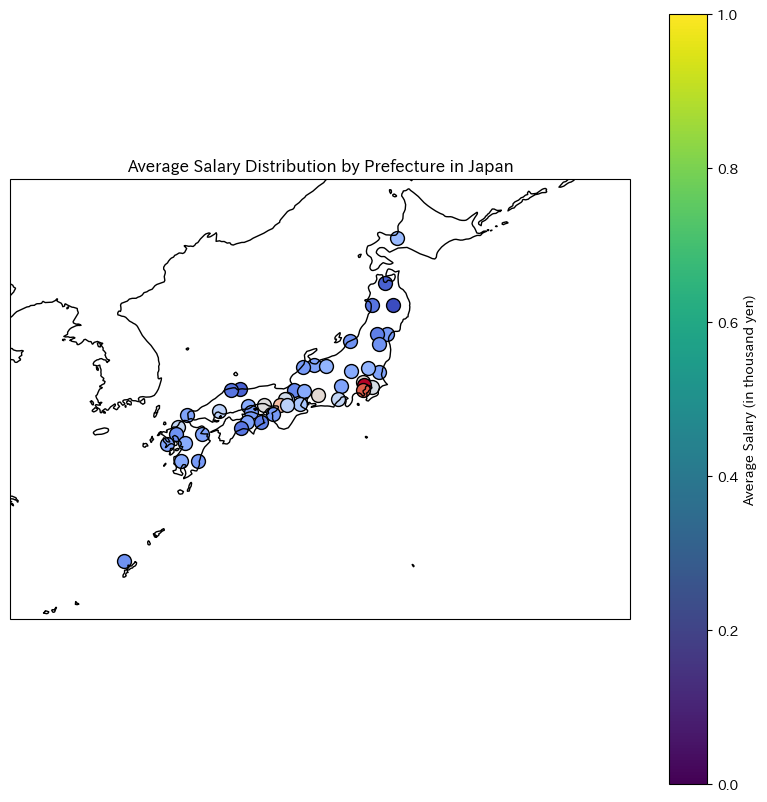

In [64]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.colors as mcolors

# 都道府県名と年収データのマッピング
location_avg_salary = {
    '北海道': 500, '青森県': 400, '岩手県': 380, '宮城県': 460, '秋田県': 420, '山形県': 430,
    '福島県': 450, '茨城県': 470, '栃木県': 490, '群馬県': 480, '埼玉県': 600, '千葉県': 580,
    '東京都': 800, '神奈川県': 750, '新潟県': 450, '富山県': 470, '石川県': 460, '福井県': 440,
    '山梨県': 470, '長野県': 490, '岐阜県': 480, '静岡県': 550, '愛知県': 600, '三重県': 520,
    '滋賀県': 530, '京都府': 570, '大阪府': 650, '兵庫県': 590, '奈良県': 540, '和歌山県': 460,
    '鳥取県': 400, '島根県': 420, '岡山県': 480, '広島県': 540, '山口県': 470, '徳島県': 430,
    '香川県': 460, '愛媛県': 470, '高知県': 420, '福岡県': 550, '佐賀県': 450, '長崎県': 470,
    '熊本県': 480, '大分県': 470, '宮崎県': 460, '鹿児島県': 480, '沖縄県': 450
}

# 都道府県の代表座標
prefecture_coords = {
    '北海道': (141.3468, 43.0642), '青森県': (140.7400, 40.8244), '岩手県': (141.1527, 39.7036),
    '宮城県': (140.8719, 38.2682), '秋田県': (140.1021, 39.7186), '山形県': (140.3261, 38.2404),
    '福島県': (140.4673, 37.7503), '茨城県': (140.4466, 36.3414), '栃木県': (139.8836, 36.5657),
    '群馬県': (139.0607, 36.3911), '埼玉県': (139.6489, 35.8569), '千葉県': (140.1233, 35.6040),
    '東京都': (139.6917, 35.6895), '神奈川県': (139.6425, 35.4478), '新潟県': (139.0236, 37.9026),
    '富山県': (137.2113, 36.6953), '石川県': (136.6256, 36.5941), '福井県': (136.2216, 35.4331),
    '山梨県': (138.5684, 35.6636), '長野県': (137.8133, 36.6513), '岐阜県': (136.7223, 35.3918),
    '静岡県': (138.3831, 34.9756), '愛知県': (137.4130, 35.1802), '三重県': (136.5086, 34.7303),
    '滋賀県': (135.8686, 35.0044), '京都府': (135.7681, 35.0116), '大阪府': (135.5022, 34.6937),
    '兵庫県': (134.6917, 34.6913), '奈良県': (135.8327, 34.6851), '和歌山県': (135.1675, 34.2260),
    '鳥取県': (133.5010, 35.5036), '島根県': (133.0505, 35.4723), '岡山県': (133.9195, 34.6618),
    '広島県': (132.4553, 34.3963), '山口県': (130.8389, 34.1859), '徳島県': (134.5595, 33.8396),
    '香川県': (134.0434, 34.3405), '愛媛県': (133.8333, 33.8416), '高知県': (133.5310, 33.5581),
    '福岡県': (130.4017, 33.5900), '佐賀県': (130.2987, 33.2490), '長崎県': (129.8737, 32.7552),
    '熊本県': (130.7417, 32.7898), '大分県': (131.6126, 33.2382), '宮崎県': (131.4231, 31.9111),
    '鹿児島県': (130.5571, 31.9200), '沖縄県': (127.6809, 26.9124)
}

# 年収の範囲を色分けするために設定
salary_values = list(location_avg_salary.values())
norm = mcolors.Normalize(vmin=min(salary_values), vmax=max(salary_values))
cmap = plt.cm.coolwarm

# 地図を描画
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# 海岸線と国境線の描画
ax.coastlines()
ax.set_extent([122, 153, 24, 46], crs=ccrs.PlateCarree())

# 都道府県ごとの年収データを色付きの点でプロット
for prefecture, (lon, lat) in prefecture_coords.items():
    salary = location_avg_salary.get(prefecture, 0)
    ax.scatter(lon, lat, c=[salary], cmap=cmap, s=100, edgecolors='black', norm=norm, transform=ccrs.PlateCarree())

# カラーバーを追加
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical')
cbar.set_label('Average Salary (in thousand yen)')

# タイトル
ax.set_title('Average Salary Distribution by Prefecture in Japan')

# 地図を表示
plt.show()

# 検証の考察
コロナ禍による強制的なリモートワークの整備により、労働者の所在地は無関係でzoomやミーティングによる相互作用的な働き方ができるようになっている。各都道府県ごとの平均年収を可視化すると東京や京都・大阪周辺の平均値が高くなっており、本社勤めの風習が払拭しきれていないことは明白であった。